## Introduction
Nowadays banknotes are one of the main tools for people and banks to make transactions. The detection of forged banknotes is essential to avoid frauds and it is an indispensable security mechanism to the banks. In this report we intend to create an analysis which will help organizations to classify false notes. This work is part of the final project requested by the course [Foundations of Data Science: K-Means Clustering in Python](https://www.coursera.org/learn/data-science-k-means-clustering-python/).

## Description of the data
Data was extracted from images that were taken from authentic and counterfeit banknote-like specimens. For digitization, a digital camera typically used for print inspection was used. A Wavelet Transform tool was used to extract features from these images (Source: [OpenML](https://www.openml.org/search?type=data&sort=runs&id=1462)).

The features (or attributes, variables) in the dataset are:
- V1. variance of Wavelet Transformed image (continuous measure)
- V2. skewness of Wavelet Transformed image (continuous)
- V3. curtosis of Wavelet Transformed image (continuous)
- V4. entropy of image (continuous)
- Class (target). Presumably 1 for genuine banknote and 2 for forged banknote

For the purposes of our initial data model, **only the first two variables (V1 and V2) were used**.



## Method

Using the two attributes, variance of wavelet and the skewness of wavelet transformed image, we will use a clusterization method in order to classify the dataset into two groups: the genuine and the forged banknotes. We will also calculate some essential metrics, such as the mean and the standard deviation, in order to understand the set of parameters.



In [48]:
# Import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sb
from google.colab import files

uploaded = files.upload()


%matplotlib inline

# Suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

Saving banknote-authentication-dataset.csv to banknote-authentication-dataset (1).csv


In [50]:
# Load data
import io
df = pd.read_csv(io.BytesIO(uploaded['banknote-authentication-dataset.csv']))
df_labels = df



In [51]:
# Set up to view all the info of the columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [52]:
df.head()


,id,V1,V2,V3,V4,Class
0,1,3.62160,8.6661,-2.8073,-0.44699,1
1,2,4.54590,8.1674,-2.4586,-1.46210,1
2,3,3.86600,-2.6383,1.9242,0.10645,1
3,4,3.45660,9.5228,-4.0112,-3.59440,1
4,5,0.32924,-4.4552,4.5718,-0.98880,1


In [53]:
df.shape


(1372, 6)

In [54]:
df.describe()

,id,V1,V2,V3,V4,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,686.500000,0.433735,1.922353,1.397627,-1.191657,1.444606
std,396.206596,2.842763,5.869047,4.310030,2.101013,0.497103
min,1.000000,-7.042100,-13.773100,-5.286100,-8.548200,1.000000
25%,343.750000,-1.773000,-1.708200,-1.574975,-2.413450,1.000000
50%,686.500000,0.496180,2.319650,0.616630,-0.586650,1.000000
75%,1029.250000,2.821475,6.814625,3.179250,0.394810,2.000000
max,1372.000000,6.824800,12.951600,17.927400,2.449500,2.000000


In [55]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      1372 non-null   int64  
 1   V1      1372 non-null   float64
 2   V2      1372 non-null   float64
 3   V3      1372 non-null   float64
 4   V4      1372 non-null   float64
 5   Class   1372 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 64.4 KB


In [56]:
df[df.duplicated()].shape[0]

0

In the following graph we can visualize the scatter plot of the dataset, considering the skewness of wavelet transformed (V2) as a function of the variance of wavelet transformed (V1).



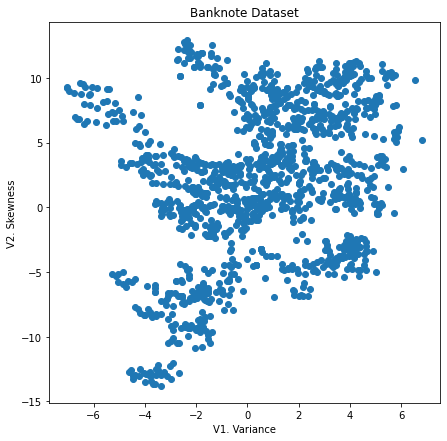

In [57]:
plt.figure(figsize = [7, 7])
plt.title("Banknote Dataset")
plt.xlabel('V1. Variance')
plt.ylabel('V2. Skewness')
plt.scatter(df.V1, df.V2);

In order to visualize some important metrics, we computed on the next figure the mean of each attribute, which gives the central value of the dataset, represented as a black dot on the graph. We also calculated the standard deviation, which provides the dipersion of the considered set, represented as a blue ellipse.



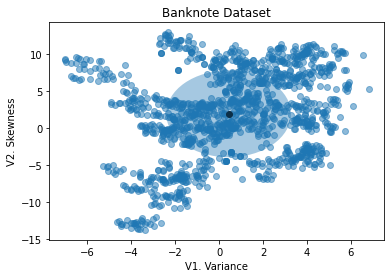

In [58]:
import matplotlib.patches as patches

V1 = df["V1"]
V2 = df["V2"]

V1_mean = V1.mean()
V2_mean = V2.mean()
V1_std = V1.std()
V2_std = V2.std()

ellipse = patches.Ellipse([V1_mean, V2_mean], V1_std*2, V2_std*2, alpha = 0.4)
fig, graph = plt.subplots()

graph.scatter(df['V1'], df['V2'], alpha = 0.5)
graph.scatter(V1_mean, V2_mean, c='k')
graph.add_patch(ellipse)
plt.title("Banknote Dataset")
plt.xlabel("V1. Variance")
plt.ylabel("V2. Skewness")
plt.savefig("figure2.pdf")

plt.show()


As we can see on figure above, the majority of the data points are far from the mean value, because the standard deviation is high, which indicates that the dots are spread out over the entire range of the values.

The figure below shows the result of the clusterization method applied to the data. In this plot it is possible to identify the red dots, reffering to the centroids of the clusterization procedure, and the two set of colors, yellow and purple, corresponding to the two clusterized groups. The algorithm used successfully split the dataset into one big group, corresponding to the forged banknotes, and to another group, corresponding to genuine banknotes.



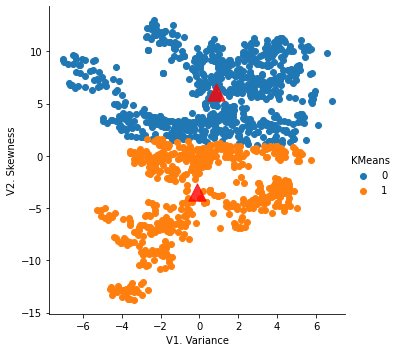

In [59]:
from sklearn.cluster import KMeans
data = np.column_stack(( df.V1, df.V2))  # we use only V1 and V2

# compute K-Means
km_res = KMeans(n_clusters = 2).fit(data)
clusters = km_res.cluster_centers_

# put the assigned labels to the original dataset
df['KMeans'] = km_res.labels_

#plot out the result
g = sb.FacetGrid(data = df, hue = 'KMeans', size = 5)
g.map(plt.scatter, 'V1', 'V2')

g.add_legend();
plt.xlabel('V1. Variance')
plt.ylabel('V2. Skewness')

plt.scatter(clusters[:,0], clusters[:,1], s=300, marker='^', c='r', alpha=0.8)


We also tested the stability of the algorithm. We re-runned 9 times. Comparing the results we can see that the method is stable, since it gave roughly the same plots. In a very tiny scale one can see very slightly differences on each run, but it is very hard to distinguish between all them.



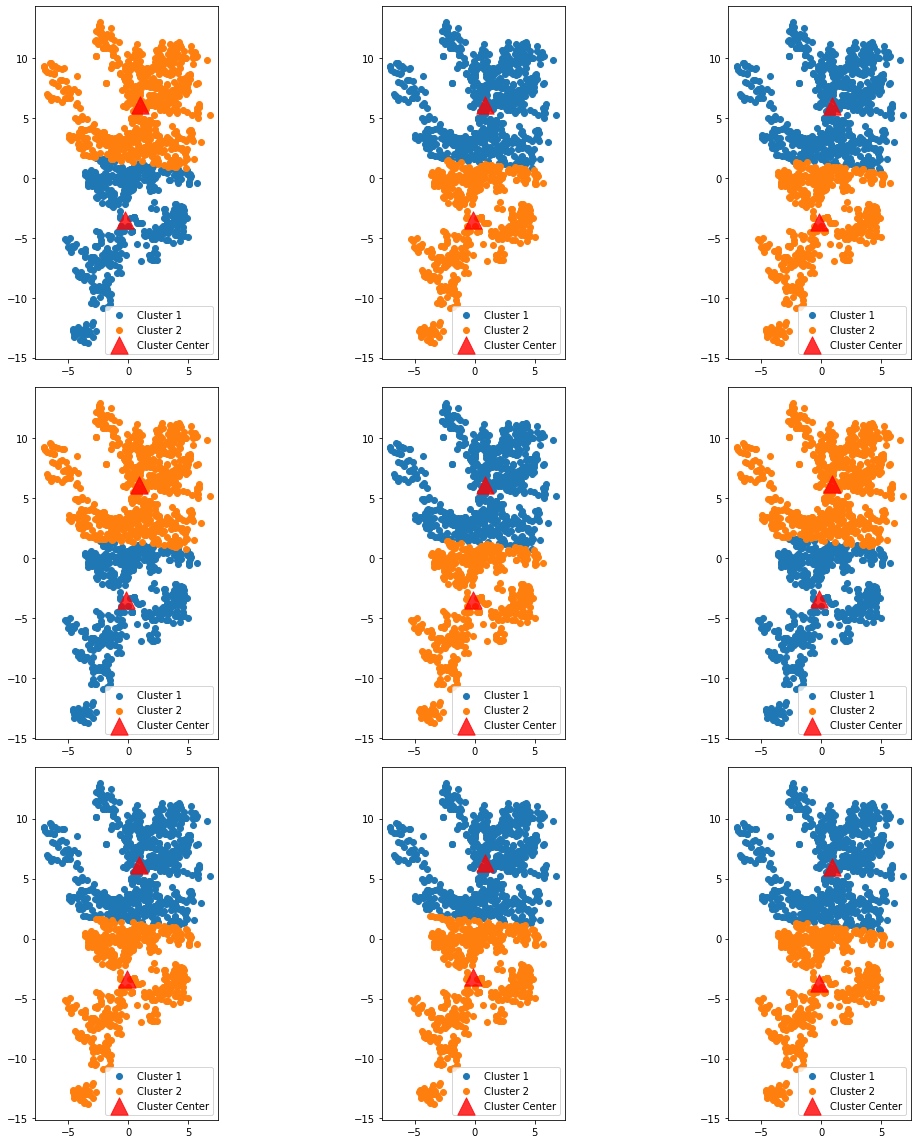

In [60]:
from sklearn.datasets import (make_blobs, make_circles, make_moons)
from sklearn.cluster import KMeans, SpectralClustering

n_iter = 9
fig, ax = plt.subplots(3, 3, figsize=(16, 16))
ax = np.ravel(ax)
centers = []
for i in range(n_iter):
    # Run local implementation of kmeans
    km = KMeans(n_clusters=2,
                max_iter=3)
    km.fit(data)
    centroids = km.cluster_centers_
    centers.append(centroids)
    ax[i].scatter(data[km.labels_ == 0, 0], data[km.labels_ == 0, 1],
                   label='Cluster 1')
    ax[i].scatter(data[km.labels_ == 1, 0], data[km.labels_ == 1, 1],
                   label='Cluster 2')
    ax[i].scatter(centroids[:, 0], centroids[:, 1],
                  c='r', marker='^', s=300, label='Cluster Center', alpha=0.8)
    ax[i].legend(loc='lower right')
    ax[i].set_aspect('equal')
    
plt.tight_layout();

In [61]:
km_res.cluster_centers_


array([[ 0.86960048,  6.12717909],
       [-0.12376677, -3.45591265]])

In [62]:
df['KMeans'] = km_res.labels_
df.groupby('KMeans').describe()


id                                                             \
        count        mean         std  min    25%    50%     75%     max   
KMeans                                                                     
0       773.0  595.882277  382.922019  1.0  280.0  542.0   892.0  1368.0   
1       599.0  803.440735  382.480842  3.0  530.0  876.0  1121.5  1372.0   

           V1                                                                \
        count      mean       std     min      25%      50%     75%     max   
KMeans                                                                        
0       773.0  0.867409  2.908508 -7.0421 -0.95403  1.11660  3.1896  6.8248   
1       599.0 -0.125914  2.655152 -5.2943 -2.18825 -0.65767  2.0159  5.7403   

           V2                                                          \
        count      mean       std      min      25%     50%       75%   
KMeans                                                                  
0       773.0  6.108644  3.096698   1.0367  3.25700  6.1437  8.794400   
1       599.0 -3.479989  3.834604 -13.7731 -6.30615 -2.9363 -0.066226   

                    V3                                                         \
            max  count      mean       std     min      25%      50%      75%   
KMeans                                                                          
0       12.9516  773.0 -1.020715  2.361730 -5.2861 -3.01120 -0.96252  0.57551   
1        1.6327  599.0  4.518459  4.251174 -2.6411  1.35225  3.68840  7.43920   

                    V4                                                         \
            max  count      mean       std     min      25%      50%      75%   
KMeans                                                                          
0        7.7618  773.0 -2.133551  2.238323 -8.5482 -3.86080 -1.72070 -0.38751   
1       17.9274  599.0  0.023844  1.012786 -3.3202 -0.54462  0.10645  0.75041   

                Class                                               
           max  count      mean       std  min  25%  50%  75%  max  
KMeans                                                              
0       2.1547  773.0  1.315653  0.465076  1.0  1.0  1.0  2.0  2.0  
1       2.4495  599.0  1.611018  0.487927  1.0  1.0  2.0  2.0  2.0

To evaluate the clustering model, the original data with labels and our K-means analysis result is compared:


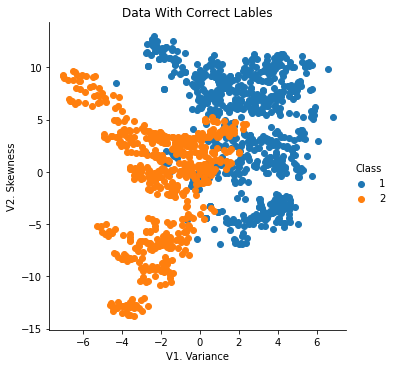

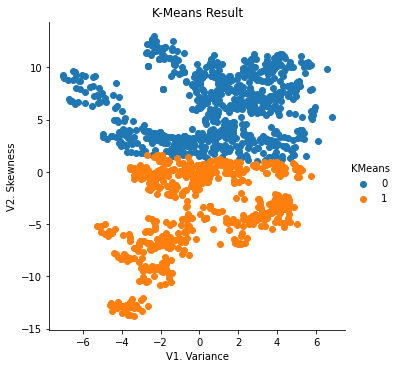

In [63]:
# plot the data with Correct labels
g = sb.FacetGrid(data = df_labels, hue = 'Class', size = 5)
g.map(plt.scatter, 'V1', 'V2')
g.add_legend()
plt.xlabel('V1. Variance')
plt.ylabel('V2. Skewness')
plt.title("Data With Correct Lables")


# plot the data computed by K-Means
g = sb.FacetGrid(data = df, hue = 'KMeans', size = 5)
g.map(plt.scatter, 'V1', 'V2')
g.add_legend()
plt.xlabel('V1. Variance')
plt.ylabel('V2. Skewness')
plt.title("K-Means Result");

In [64]:
# correct the labels
df["KMeans"] = df["KMeans"].map({0:1, 1:2})


In [65]:
correct = 0

for i in range(0,1372):
    if df.Class[i] == df["KMeans"][i]:
        correct+=1
print(correct/1371)


0.6528081692195478


After comparing the value of each observation in both situations, it is concluded that the accuracy of this K-Means Model is 65.3%.

## Summary

In dataset analysed on this project we could see a clearly spread of values, as we reported on the second figure. However we can not consider the existence of outliers, because of the range of the data in relation to the size of the area corresponding to the standard deviation. It is also possible to see, in the third figure, that the clusterization method divides the dataset into two big groups, which allows one to identify the real and the forged bancknotes. Running the algorithm 6 times gave roughly the same result. In a very tiny scale one can see very slightly differences on each run, but it is very hard to distinguish between all them. Thus, it is possible to say that the algorithm is stable to detect forged banknotes.

The accuracy of the analysis is 65.3%, which is considerably better than a random guess. Based on the data analysis performed, the k-means clustering algorithm is recommended to help with fake banknotes recognition.


## Recommendations

It’s recommended to explore whether other combinations of features are able to build a better model with higher accuracy. In this regard, it is highly recommended to split the data into train, test and validation sets to examine the model’s ability to classify new data as forged or genuine banknotes.
To complement the analysis in this project, it’s advised to decompose the data into components to analyze what banknotes features are best explaining how to classify a banknote as real or fake. It’s also advised to explore other algorithms in combination with model build in this project.

